# Klassikalised fraktalid ja sarnasusdimensioon

Viimastes loengutes oleme näinud, et atraktoritel võib olla ka "kummaline" struktuur. Kaootiliste süsteemide atraktorid on tihti *fraktaalsed*. Käesolev tööleht selgitab fraktaalide põhimõisteid ja omadusi.

## Hulgad eukleidilises ruumis ja sarnasusdimensioon

Fraktaalide mõõtmiseks oluline omadus on fraktaali *dimensioon*, mida saab erivatel viisidel defineerida. Üks kõige lihtsamatest definitsioonitest on *sarnasusdimensioon*. Selle mõiste kirjeldamiseks on kõige lihtsam vaadata kuupi $K^d = [0, 1]^d \subset \mathbb{R}^d$ üldises $d$-mõõtmelises eukleidilises ruumis. Kui me võtame kordajaga $\frac{1}{n}$ skaleeritud kuupi

$$\left\{\frac{(x_1, x_2, \ldots, x_d)}{n}, (x_1, x_2, \ldots, x_d) \in K^d\right\},$$

siis võib $N = n^d$ koopiast kuupi $K^d$ taas ehitada,

$$K^d = \bigcup_{a_1 = 0}^{n - 1}\cdots\bigcup_{a_d = 0}^{n - 1}\left\{\frac{(x_1 + a_1, x_2 + a_2, \ldots, x_d + a_d)}{n}, (x_1, x_2, \ldots, x_d) \in K^d\right\}.$$

Kuubi dimensiooni leiame kui $d = \frac{\ln N}{\ln n}$. Seega defineerime: Kui fraktaalset hulka saab jagada $N$ osaks nii, et iga osa on $n$ korda väiksem kui esialgne hulk, siis tema sarnasusdimensioon on $\frac{\ln N}{\ln n}$.

## Klassikalised fraktaalid ja nende sarnasusdimensioonid

Järgmisena uurime erinevaid fraktaale. Nende joonistamiseks kasutame SVG graafikaformaati.

In [1]:
from IPython.display import SVG, display
from math import sqrt

Kuna meie joonised on suuremad kui tavaliselt, suurendame ka tulemusalasid.

In [2]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:10000px;
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

### Cantori hulk

[Cantori hulk](http://en.wikipedia.org/wiki/Cantor_set) $C_{\infty}$ on tüüpiline fraktaali näide, mida võib defineerida sellisel viisil:

* $C_0 = [0, 1]$.
* $C_{n + 1} = \left\{\frac{x}{3}, x \in C_n\right\} \cup \left\{\frac{x + 2}{3}, x \in C_n\right\}$.
* $$C_{\infty} = \bigcap_{n = 0}^{\infty}C_n.$$

Hulki $C_n$ võime ka joonistada SVG graafikuna Pythoni abil. Selleks defineerime:

In [3]:
def cantor(n):
    display(SVG(data=cantorsvg(cantorit(n, 0.0, 1.0))))

def cantorsvg(s):
    return '<svg version="1.1" width="640px" height="32px" stroke="black" stroke-width="0.01" fill="none" viewBox="0 -0.0125 1 0.025">\n' + s + '</svg>'
    
def cantorit(n, x1, x2):
    s = ""
    if n > 0:
        s = s + cantorit(n - 1, x1, (2 * x1 + x2) / 3)
        s = s + cantorit(n - 1, (2 * x2 + x1) / 3, x2)
    else:
        s = s + '<line x1="%f" y1="0" x2="%f" y2="0"/>\n' % (x1, x2)
    return s

Funktsioon `cantorit` joonistab vahemikke, millest koosneb hulk $C_n$. `cantorsvg` lisab SVG graafiku jaoks vajalikke andmeid, ja `cantor` näitab joonist. Tulemus on siis selline:

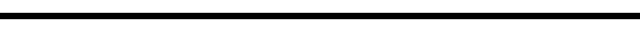

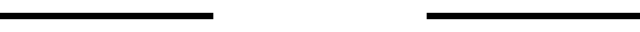

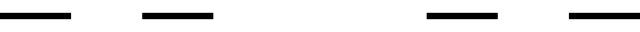

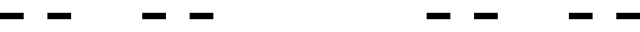

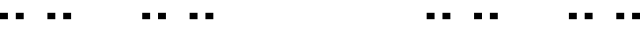

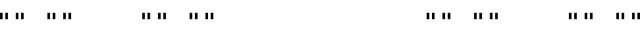

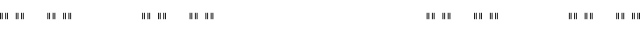

In [4]:
for n in range(7):
    cantor(n)

Nagu me näeme, on esimesed hulgad sellised:

\begin{align}
C_0 &= [0, 1],\\
C_1 &= \left[0, \frac{1}{3}\right] \cup \left[\frac{2}{3}, 1\right],\\
C_2 &= \left[0, \frac{1}{9}\right] \cup \left[\frac{2}{9}, \frac{1}{3}\right] \cup \left[\frac{2}{3}, \frac{7}{9}\right] \cup \left[\frac{8}{9}, 1\right].
\end{align}

Lisaks näeme, et Cantori hulk $C_{\infty}$ kindlasti ei ole tühi, sest vahemikute piirid kuuluvad Cantori hulka. Aga nad ei ole ainsad Cantori hulga elemendid - tegelikult on Cantori hulk mitteloenduv. Selleks et seda näidata võime defineerida punkti $x \in C_{\infty}$ *aadressi* järgneva protseduuri abil:

* Kuna $x \in C_{\infty}$, kehtib ka $x \in C_1$. Hulk $C_1$ koosneb kahest osast, vahemikutest $C_1^- = \left[0, \frac{1}{3}\right]$ ja $C_1^+ = \left[\frac{2}{3}, 1\right]$. Kui $x \in C_1^-$, defineerime $x_1 = 0$. Kui $x \in C_1^+$, defineerime $x_1 = 1$.
* Kuna $x \in C_{\infty}$, kehtib ka $x \in C_2$. Hulk $C_2$ võime samuti kahesse ossa jagada. Selleks defineerime:
$$C_2^{\pm} = \left\{\frac{x}{3}, x \in C_1^{\pm}\right\} \cup \left\{\frac{x + 2}{3}, x \in C_1^{\pm}\right\}$$
Kui $x \in C_2^-$, defineerime $x_2 = 0$. Kui $x \in C_2^+$, defineerime $x_2 = 1$.
* Edasi defineerime
$$C_{n + 1}^{\pm} = \left\{\frac{x}{3}, x \in C_n^{\pm}\right\} \cup \left\{\frac{x + 2}{3}, x \in C_n^{\pm}\right\},$$
ja seega kui $x \in C_n^-$, defineerime $x_n = 0$. Kui $x \in C_n^+$, defineerime $x_n = 1$.

Hulgad $C_n^{\pm}$ on järgnevalt joonistatud, kus <span style="color:blue">$C_n^-$</span> on sinine ja <span style="color:red">$C_n^+$</span> on punane.

In [5]:
def cantorc(n):
    display(SVG(data=cantorcsvg(cantorcit(n - 1, 0.0, 1.0 / 3.0, 'blue') + cantorcit(n - 1, 2.0 / 3.0, 1.0, 'red'))))

def cantorcsvg(s):
    return '<svg version="1.1" width="640px" height="32px" stroke-width="0.01" fill="none" viewBox="0 -0.0125 1 0.025">\n' + s + '</svg>'
    
def cantorcit(n, x1, x2, c):
    s = ""
    if n > 0:
        s = s + cantorcit(n - 1, x1, (2 * x1 + x2) / 3, 'blue')
        s = s + cantorcit(n - 1, (2 * x2 + x1) / 3, x2, 'red')
    else:
        s = s + '<line x1="%f" y1="0" x2="%f" y2="0" stroke="%s"/>\n' % (x1, x2, c)
    return s

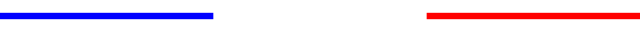

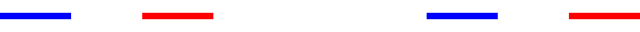

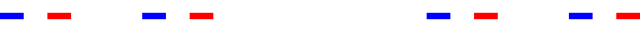

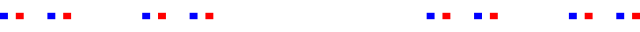

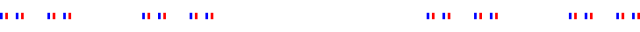

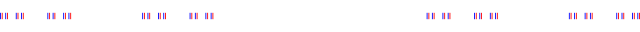

In [6]:
for n in range(1, 7):
    cantorc(n)

Kuna $C_n^- \cap C_n^+ = \emptyset$, on igal punktil $x \in C_{\infty}$ unikaalne aadress $(x_1, x_2, \ldots)$. Samuti võib näidata, et igale aadressile vastab ka unikaalne punkt $x \in C_{\infty}$, mida annab meile võrrand

$$x = \frac{1}{2} + \sum_{n = 1}^{\infty}\frac{2x_n - 1}{3^n}.$$

Aadressite hulk on mitteloenduv, seega kehtib sama ka Cantori hulga kohta.

Cantori hulgal on lisaks ka omadus, et kehtib

$$C_{\infty} = \left\{\frac{x}{3}, x \in C_{\infty}\right\} \cup \left\{\frac{x + 2}{3}, x \in C_{\infty}\right\}.$$

See tähendab, et kui me skaleerime Cantori hulka kordajaga $\frac{1}{3}$ ja võtame sellest väiksemast hulgast kaks koopiat, saame jälle Cantori hulka. Sellest järeldub, et Cantori hulga sarnasusdimensioon on $\frac{\ln 2}{\ln 3} \approx 0.63092975357145743710$.

### Sierpinski vaip

[Sierpinski vaip](http://en.wikipedia.org/wiki/Sierpinski_carpet) on konstrueeritud sarnase printsiibiga kui Cantori hulk. Seekord alustatakse hulgast $S_0 = [0, 1] \times [0, 1]$. Seejärel kasutatakse rekursiooni

$$\begin{split}
S_{n + 1} &= \left\{\left(\frac{x}{3}, \frac{y}{3}\right), (x, y) \in S_n\right\}\\
&\cup \left\{\left(\frac{x}{3}, \frac{y + 1}{3}\right), (x, y) \in S_n\right\}\\
&\cup \left\{\left(\frac{x}{3}, \frac{y + 2}{3}\right), (x, y) \in S_n\right\}\\
&\cup \left\{\left(\frac{x + 1}{3}, \frac{y}{3}\right), (x, y) \in S_n\right\}\\
&\cup \left\{\left(\frac{x + 1}{3}, \frac{y + 2}{3}\right), (x, y) \in S_n\right\}\\
&\cup \left\{\left(\frac{x + 2}{3}, \frac{y}{3}\right), (x, y) \in S_n\right\}\\
&\cup \left\{\left(\frac{x + 2}{3}, \frac{y + 1}{3}\right), (x, y) \in S_n\right\}\\
&\cup \left\{\left(\frac{x + 2}{3}, \frac{y + 2}{3}\right), (x, y) \in S_n\right\}.
\end{split}$$

Lõpuks defineerime, nagu ka Cantori hulga puhul:

$$S_{\infty} = \bigcap_{n = 0}^{\infty}S_n.$$

Joonis on siis järgnevalt.

In [7]:
def sierp4(n):
    display(SVG(data=sierp4svg(sierp4it(n, 0.0, 0.0, 1.0, 1.0))))

def sierp4svg(s):
    return '<svg width="640px" height="640px" version="1.1" stroke="none" fill="black" viewBox="0 0 1 1">\n' + s + '</svg>'
    
def sierp4it(n, x1, y1, x2, y2):
    s = ""
    if n > 0:
        s = s + sierp4it(n - 1, x1, y1, (2 * x1 + x2) / 3, (2 * y1 + y2) / 3)
        s = s + sierp4it(n - 1, x1, (2 * y1 + y2) / 3, (2 * x1 + x2) / 3, (2 * y2 + y1) / 3)
        s = s + sierp4it(n - 1, x1, (2 * y2 + y1) / 3, (2 * x1 + x2) / 3, y2)
        s = s + sierp4it(n - 1, (2 * x1 + x2) / 3, y1, (2 * x2 + x1) / 3, (2 * y1 + y2) / 3)
        s = s + sierp4it(n - 1, (2 * x1 + x2) / 3, (2 * y2 + y1) / 3, (2 * x2 + x1) / 3, y2)
        s = s + sierp4it(n - 1, (2 * x2 + x1) / 3, y1, x2, (2 * y1 + y2) / 3)
        s = s + sierp4it(n - 1, (2 * x2 + x1) / 3, (2 * y1 + y2) / 3, x2, (2 * y2 + y1) / 3)
        s = s + sierp4it(n - 1, (2 * x2 + x1) / 3, (2 * y2 + y1) / 3, x2, y2)
    else:
        s = s + '<rect x="%f" y="%f" width="%f" height="%f"/>\n' % (x1, y1, x2 - x1, y2 - y1)
    return s

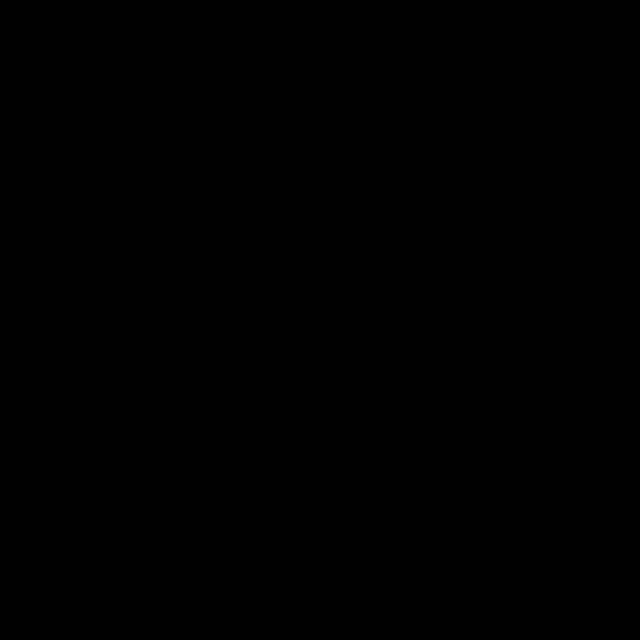

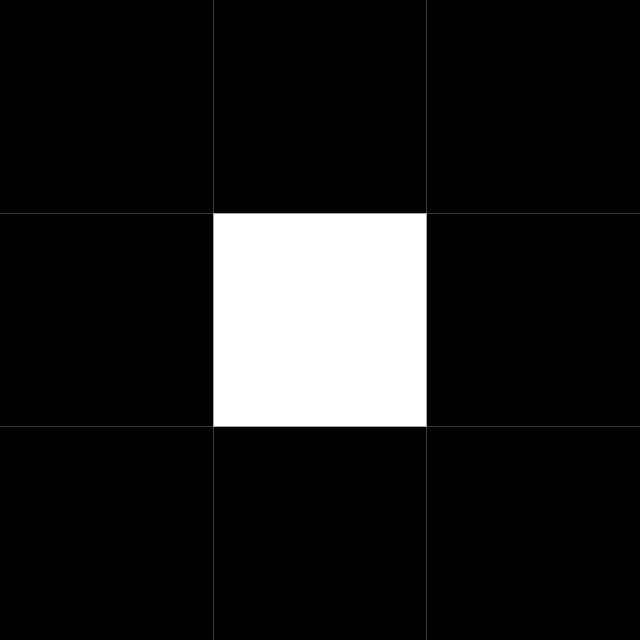

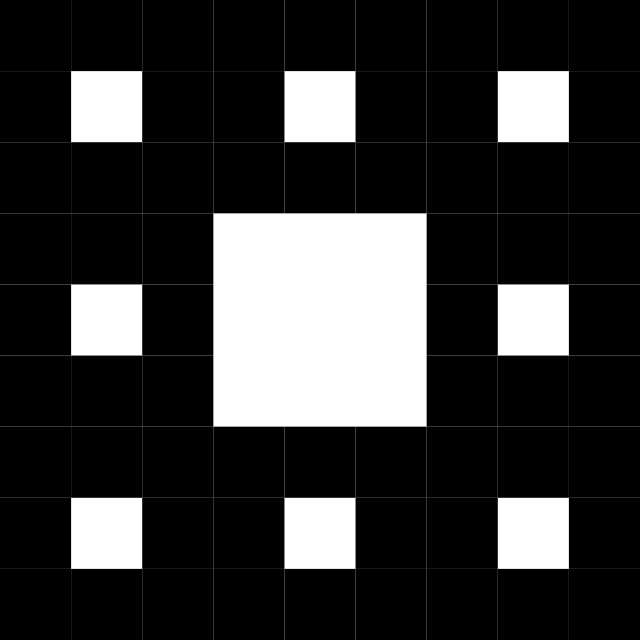

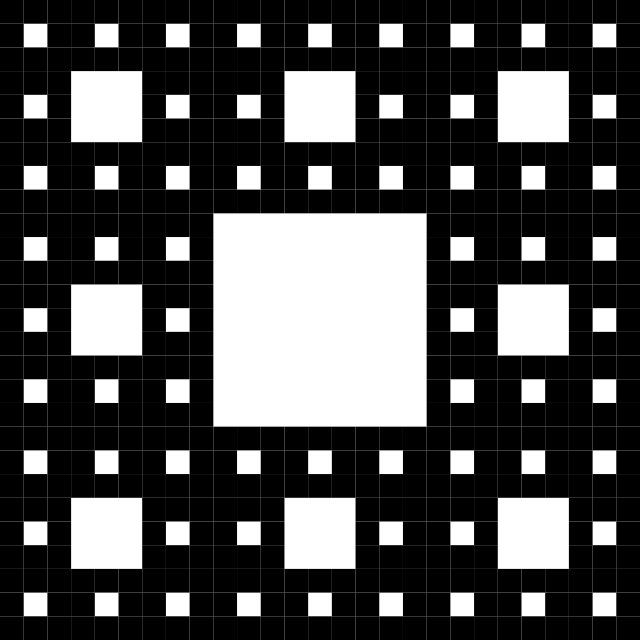

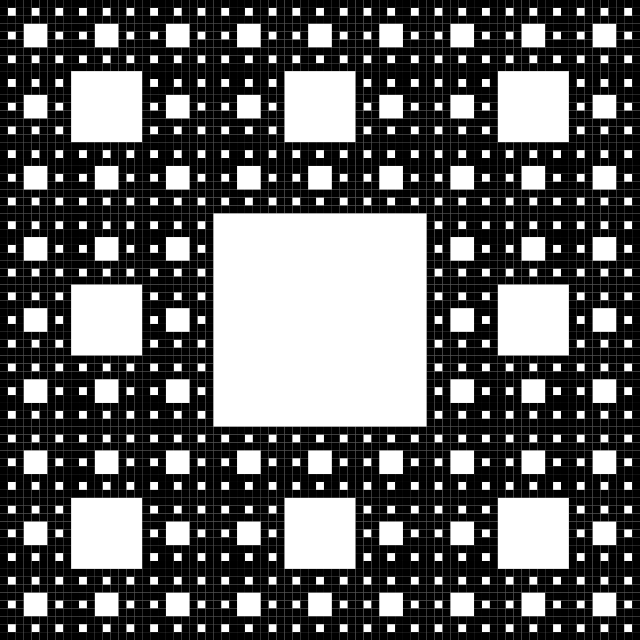

In [8]:
for n in range(6):
    sierp4(n)

Siin leiame, et kui me skaleerime kordajaga $\frac{1}{3}$, siis piisab kaheksast väikesest koopiast, et kogu hulka taastada. Seega on sarnasusdimensioon $\frac{\ln 8}{\ln 3} \approx 1.8927892607143723113$.

### Sierpinski kolmnurk

Sama printsiibi rakendades saame ka [Sierpinski kolmnurka](http://en.wikipedia.org/wiki/Sierpinski_triangle) konstrueerida. Sel juhul on esialgne hulk kolmnurk

$$T_0 = \triangle(P_0, P_1, P_2), \quad P_i = \left(\cos\frac{2\pi i}{3}, \sin\frac{2\pi i}{3}\right).$$

Rekursioonivalem on seekord

$$T_{n + 1} = \bigcup_{j = 0}^2\left\{\frac{1}{2}\left[(x, y) + \left(\cos\frac{2\pi j}{3}, \sin\frac{2\pi j}{3}\right)\right], (x, y) \in T_n\right\}.$$

Veel kord defineerime:

$$T_{\infty} = \bigcap_{n = 0}^{\infty}T_n.$$

Tulemus on siis selline:

In [9]:
def sierp3(n):
    display(SVG(data=sierp3svg(sierp3it(n, 0.0, 0.0, 1.0, 0.0, 0.5, -sqrt(3.0) / 2.0))))

def sierp3svg(s):
    return '<svg width="640px" height="560px" version="1.1" stroke="none" fill="black" viewBox="0 -0.875 1 0.875">\n' + s + '</svg>'
    
def sierp3it(n, x1, y1, x2, y2, x3, y3):
    s = ""
    if n > 0:
        s = s + sierp3it(n - 1, x1, y1, (x1 + x2) / 2, (y1 + y2) / 2, (x1 + x3) / 2, (y1 + y3) / 2)
        s = s + sierp3it(n - 1, (x1 + x2) / 2, (y1 + y2) / 2, x2, y2, (x2 + x3) / 2, (y2 + y3) / 2)
        s = s + sierp3it(n - 1, (x1 + x3) / 2, (y1 + y3) / 2, (x2 + x3) / 2, (y2 + y3) / 2, x3, y3)
    else:
        s = s + '<polygon points="%f,%f %f,%f %f,%f"/>\n' % (x1, y1, x2, y2, x3, y3)
    return s

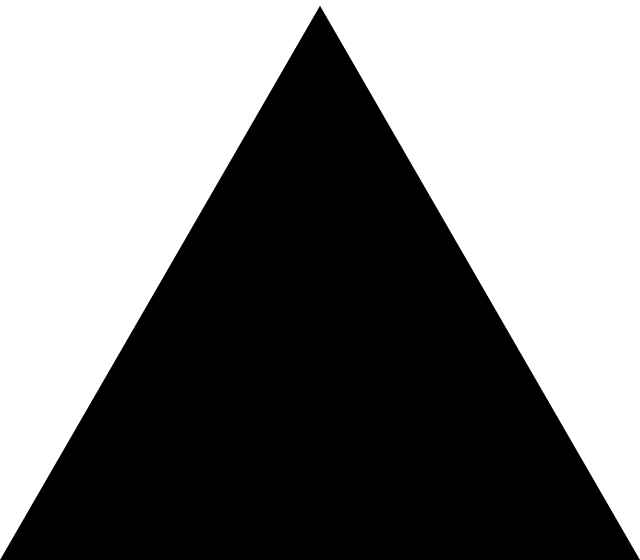

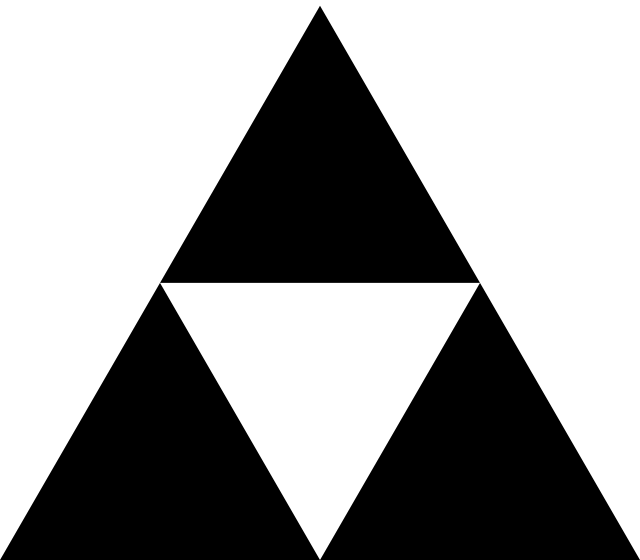

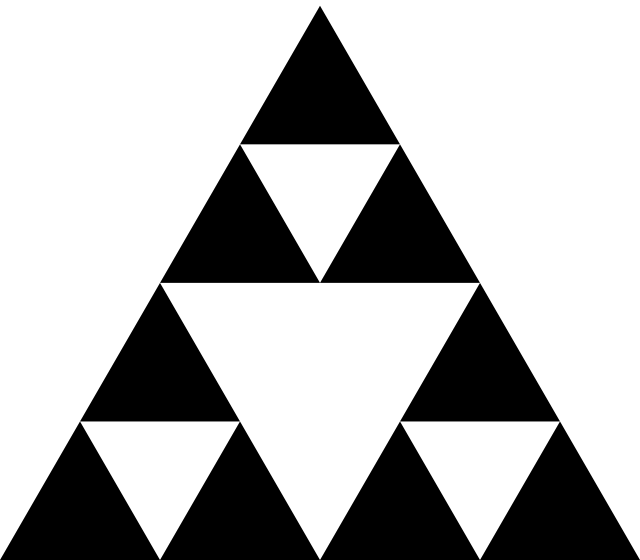

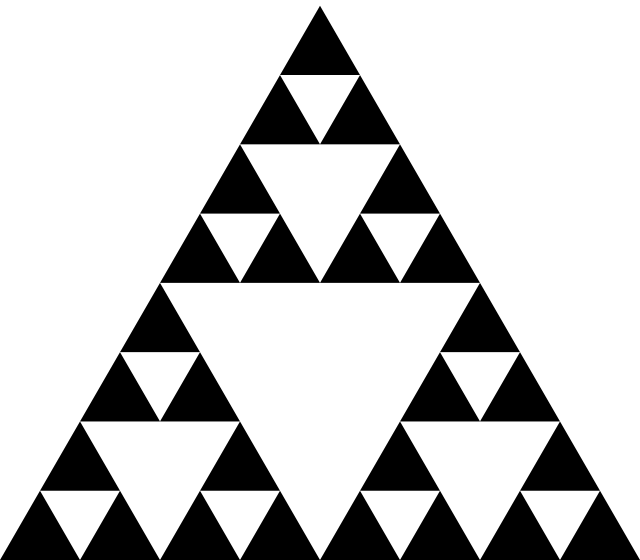

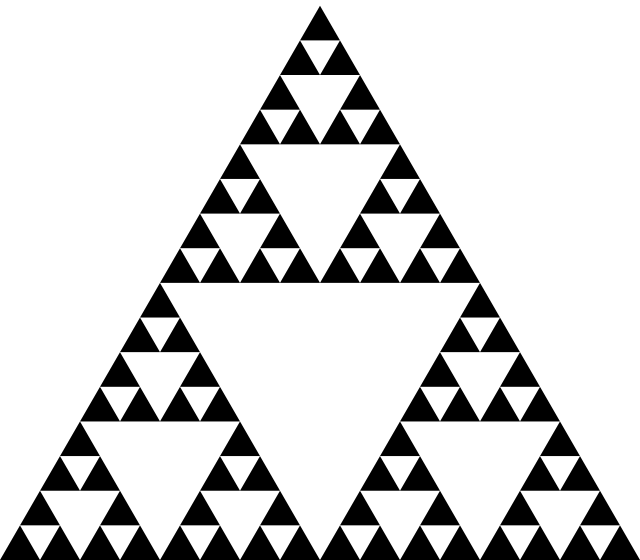

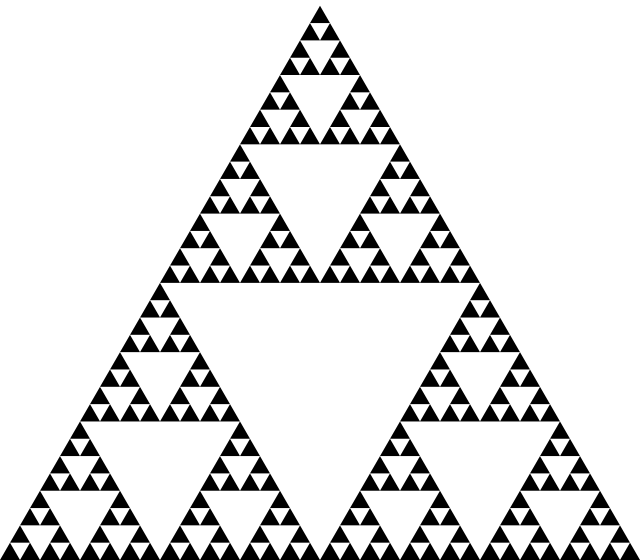

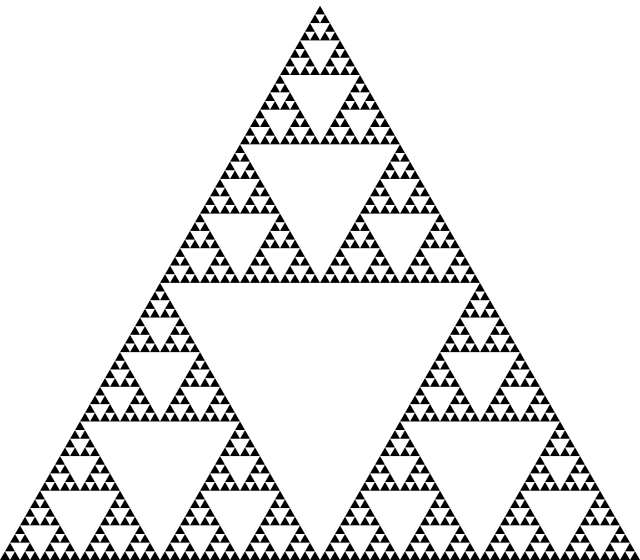

In [10]:
for n in range(7):
    sierp3(n)

Kuna Sierpinski kolmnurk koosneb kolmest väiksemast koopiast, mis on skaleeritud kordajaga $\frac{1}{2}$, järeldub, et sarnasusdimensioon on $\frac{\ln 3}{\ln 2} \approx 1.5849625007211561815$.

### Kochi lumehelbeke

[Kochi lumehelbeke](http://en.wikipedia.org/wiki/Koch_snowflake) on konstrueeritud teistsuguse printsiibiga. Nagu Cantori hulga puhul alustatakse ühemõõtmelisest vahemikust. Igal sammul samuti võetakse keskmise kolmandiku ära, kuid antud juhul asendatakse äravõetud osa kahe sama pikkusega lõiguga, mille vahel on nurk 60°. Konstruktsiooni selgitab ja järgnev joonis:

In [11]:
def koch(n):
    display(SVG(data=kochsvg(kochit(n, 0.0, 0.0, 1.0, 0.0))))

def kochsvg(s):
    return '<svg version="1.1" width="640px" height="200px" stroke="black" stroke-width="0.002" fill="none" viewBox="0 -0.3 1 0.3125">\n' + s + '</svg>'
    
def kochit(n, x1, y1, x2, y2):
    s = ""
    if n > 0:
        s = s + kochit(n - 1, x1, y1, (2 * x1 + x2) / 3, (2 * y1 + y2) / 3)
        s = s + kochit(n - 1, (2 * x1 + x2) / 3, (2 * y1 + y2) / 3, (x1 + x2) / 2 + (y2 - y1) * sqrt(3.0) / 6, (y1 + y2) / 2 - (x2 - x1) * sqrt(3.0) / 6)
        s = s + kochit(n - 1, (x1 + x2) / 2 + (y2 - y1) * sqrt(3.0) / 6, (y1 + y2) / 2 - (x2 - x1) * sqrt(3.0) / 6, (2 * x2 + x1) / 3, (2 * y2 + y1) / 3)
        s = s + kochit(n - 1, (2 * x2 + x1) / 3, (2 * y2 + y1) / 3, x2, y2)
    else:
        s = s + '<line x1="%f" y1="%f" x2="%f" y2="%f"/>\n' % (x1, y1, x2, y2)
    return s

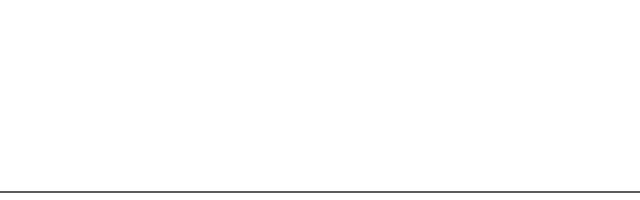

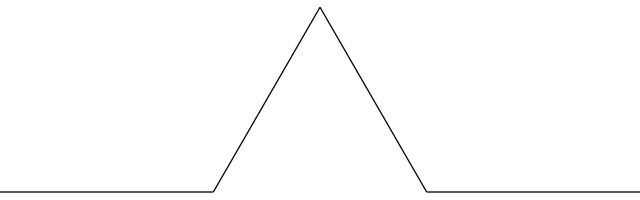

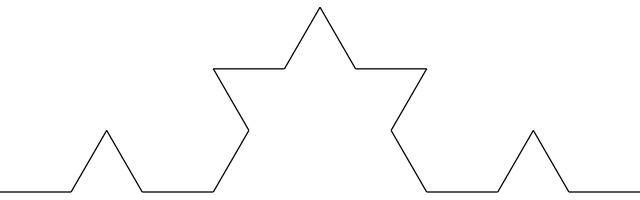

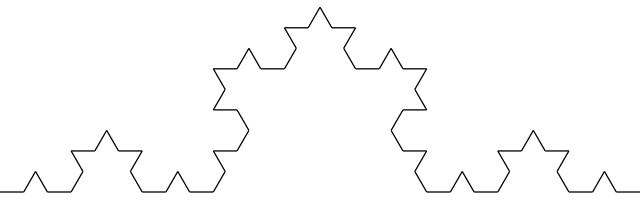

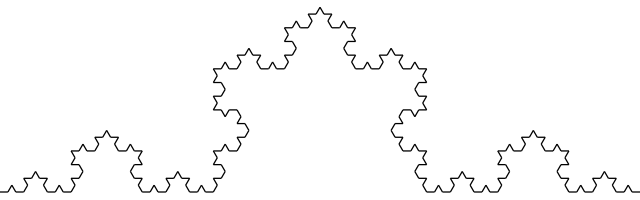

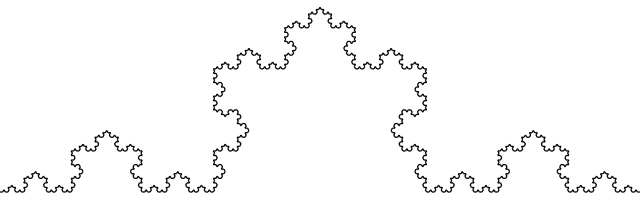

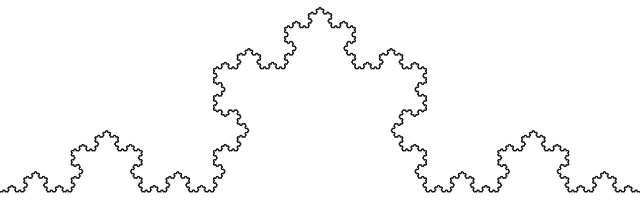

In [12]:
for n in range(7):
    koch(n)

Kochi lumehelbeke koosneb neljast osast, millest iga osa on skaleeritud kordajaga $\frac{1}{3}$. Seega on sarnasusdimensioon $\frac{\ln 4}{\ln 3} \approx 1.2618595071429148742$.